# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
#from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv(r'E:\Education\Ebooks\Phd\T1\Deep\HW\HW1\data\user_artists.dat', sep='\t')
artists = pd.read_csv(r'E:\Education\Ebooks\Phd\T1\Deep\HW\HW1\data\artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################


plays2 = plays.sort_values(['artistID', 'userID'], ascending = True)
ap = plays2.reset_index(drop = True)
repNum = ap.groupby('artistID').count()['userID'].values
rep_artists = pd.DataFrame(np.repeat(artists.values, repNum, axis = 0), columns = artists.columns)
ap = pd.concat([rep_artists, ap], axis = 1)

In [4]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})


In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap = ap.drop(columns = ['id'])

#TODO

In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################
totalUniqueUsers = ap.groupby('name').count()
totalArtistPlays = ap.groupby('name').sum()['playCount'].values
avgUserPlays = totalArtistPlays/totalUniqueUsers['userID'].values
artist_rank = pd.DataFrame(columns = ['name', 'totalUniqueUsers', 'totalArtistPlays', 'avgUserPlays'])
artist_rank['name'] = totalUniqueUsers.index.values
artist_rank['totalUniqueUsers'] = totalUniqueUsers['userID'].values
artist_rank['totalArtistPlays'] = totalArtistPlays
artist_rank['avgUserPlays'] = avgUserPlays
artist_rank.sort_values('totalArtistPlays', ascending = False, inplace = True, ignore_index = True)



In [8]:
artist_rank

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Britney Spears,522,2393140,4584.559387
1,Depeche Mode,282,1301308,4614.567376
2,Lady Gaga,611,1291387,2113.563011
3,Christina Aguilera,407,1058405,2600.503686
4,Paramore,399,963449,2414.659148
...,...,...,...,...
17627,Morris,1,1,1.000000
17628,Eddie Kendricks,1,1,1.000000
17629,Excess Pressure,1,1,1.000000
17630,My Mine,1,1,1.000000


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
df1 = ap.sort_values('name')
df2 = artist_rank.sort_values('name')
df2 = df2.drop(columns = 'name')
repNum = df2.iloc[:,0].values
df3 = pd.DataFrame(np.repeat(df2.values, repNum, axis = 0), columns = df2.columns)
df3.set_index(df1.index.values, inplace = True)
cols = list(ap.columns.values)
cols.extend(list(df3.columns.values))
ap = pd.concat([df1, df3], axis = 1)
ap.sort_values('playCount', ascending = False, inplace = True)
ap['totalUniqueUsers'] = ap['totalUniqueUsers'].astype(np.int32)
ap['totalArtistPlays'] = ap['totalArtistPlays'].astype(np.int32)


#ap = #TODO

In [10]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148
21191,Evanescence,1146,378,203165,226,513476,2272.017699
14165,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,Shakira,1983,701,172496,319,688529,2158.398119
33127,Shakira,757,701,169596,319,688529,2158.398119
31835,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

G:\Users\avajang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


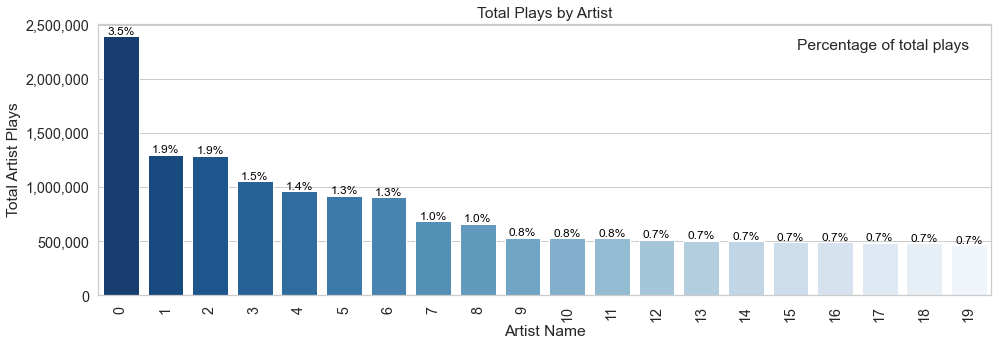

In [12]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

G:\Users\avajang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


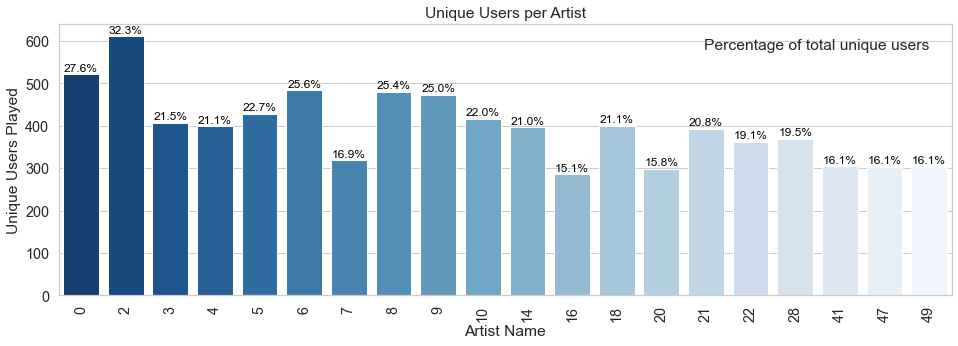

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

G:\Users\avajang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


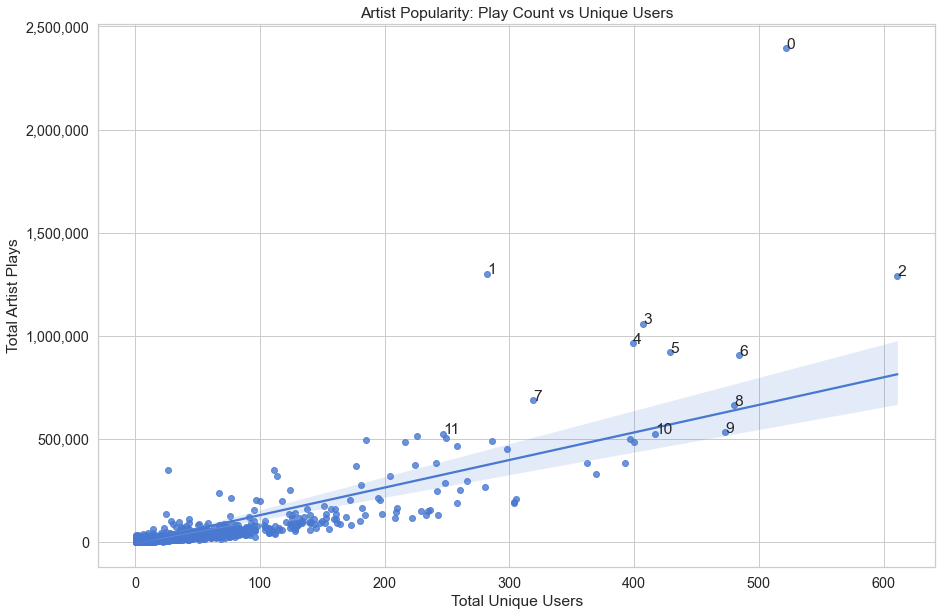

In [14]:
top_artists =np.arange(12)  # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank['totalUniqueUsers'].values# TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays'].values# TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index.values # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [15]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [16]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
df1 = ap[['userID', 'artistID', 'playCountScaled']]
df1.reset_index(drop = True, inplace = True)
df1 = df1.sort_values(['userID', 'artistID'], ignore_index = True)


ratings_df = pd.DataFrame(index = np.unique(ap['userID'].values), columns = np.unique(ap['artistID'].values))
ratings_df.columns.name = 'artistID'
ratings_df.index.name = 'userID'
idxr = df1['userID'].values
idxc = df1['artistID'].values
for l, k in enumerate(idxr):
    ratings_df.loc[k, idxc[l]] = df1['playCountScaled'].values[l]
    


In [17]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0)
ratings = ratings.to_numpy()

In [19]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
SpR = np.count_nonzero(ratings)/np.size(ratings)
print(f'Sparsity ratio in percent: {100*SpR}')

## END

Sparsity ratio in percent: 0.2763750225421394


# Fitting(Training) Model (50pts)

In [20]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    [Ri, Ci] = np.nonzero(ratings)
    CNZ = np.count_nonzero(ratings, axis = 1)
    validation = np.zeros_like(ratings)
    train = ratings.copy()
    for i, c in enumerate(CNZ):
        if c >= MIN_USER_RATINGS:
            idx = np.where(Ri==i)
            idy = Ci[idx]
            id_val = np.random.choice(idy, DELETE_RATING_COUNT, replace = False)
            validation[i, id_val] = ratings[i, id_val]
            train[i, id_val] = 0.0        
    return train, validation

In [22]:
train, val = train_test_split(ratings)


In [23]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################

def rmse(prediction, ground_truth):
    [r, c] = np.nonzero(ground_truth)
    prediction = prediction[r, c]# TODO
    ground_truth = ground_truth[r, c]# TODO
    return sqrt(mean_squared_error(prediction, ground_truth))

In [37]:
class Recommender:
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.07, learning_rate=0.002):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return (P @ Q)
  
  def fit(self, X_train, X_val):
    shap = X_train.shape
    self.P = np.random.normal(size = (shap[0], 3))
    self.Q = np.random.normal(size = (3, shap[1]))
    IX, IY = np.nonzero(X_train)
    print('dddd', len(IX))
    IX_V, IY_V = np.nonzero(X_val)
    self.L_Tr = np.zeros(self.n_epochs); self.L_Val = np.zeros(self.n_epochs)
    for epoch in range(self.n_epochs):
        print('Epoch: ', epoch)
        IDX = np.array([IX, IY]).transpose()
        np.random.shuffle(IDX)
        IX = IDX[:, 0]; IY = IDX[:, 1]
        for i in range(len(IX)):
            p = self.P[IX[i], :]
            q = self.Q[:, IY[i]]
            self.P[IX[i], :] = p + self.learning_rate*(-q*(np.dot(p, q)-X_train[IX[i], IY[i]])-self.lmbda*p)
            p = self.P[IX[i], :]
            self.Q[:, IY[i]] = q + self.learning_rate*(-p*(np.dot(p, q)-X_train[IX[i], IY[i]])-self.lmbda*q)
        Pred = self.predictions(self.P, self.Q)
        self.L_Tr[epoch] = rmse(Pred, X_train)
        self.L_Val[epoch] = rmse(Pred, X_val)
        print(f'Train Loss = {self.L_Tr[epoch]}, Val Loss = {self.L_Val[epoch]}')
    return self

  def predict(self, X_train, user_index):
        return self.P[user_index, :] @ self.Q
    #TODO : return predicted ratings for unobserved values of specific user index

In [38]:
#creating recommender object
recommender = Recommender().fit(train, val)

dddd 64748
Epoch:  0
Train Loss = 1.4420929268728377, Val Loss = 1.4557735643559646
Epoch:  1
Train Loss = 1.2675780420742797, Val Loss = 1.2982804488913742
Epoch:  2
Train Loss = 1.1394531343482213, Val Loss = 1.183041508785166
Epoch:  3
Train Loss = 1.0386068909309925, Val Loss = 1.0923026600109467
Epoch:  4
Train Loss = 0.9557936350845465, Val Loss = 1.0176240540558341
Epoch:  5
Train Loss = 0.8858704120147904, Val Loss = 0.9543441129623074
Epoch:  6
Train Loss = 0.8256518194314695, Val Loss = 0.899599560281011
Epoch:  7
Train Loss = 0.7730142391398458, Val Loss = 0.8515006799373371
Epoch:  8
Train Loss = 0.7264562514191824, Val Loss = 0.8087213666124022
Epoch:  9
Train Loss = 0.6848973280138269, Val Loss = 0.7703131300693745
Epoch:  10
Train Loss = 0.6475107547021565, Val Loss = 0.7355516643570549
Epoch:  11
Train Loss = 0.6136624255453343, Val Loss = 0.7038824501734148
Epoch:  12
Train Loss = 0.5828475866282639, Val Loss = 0.6748706736977372
Epoch:  13
Train Loss = 0.5546580792257

Train Loss = 0.05994459469201244, Val Loss = 0.11158555430181429
Epoch:  110
Train Loss = 0.05913664226400636, Val Loss = 0.11039320565521595
Epoch:  111
Train Loss = 0.05834491733454845, Val Loss = 0.10922067620756287
Epoch:  112
Train Loss = 0.057568986502475016, Val Loss = 0.10806755207828295
Epoch:  113
Train Loss = 0.05680843701497355, Val Loss = 0.1069334484197933
Epoch:  114
Train Loss = 0.056062854936901774, Val Loss = 0.10581765856383697
Epoch:  115
Train Loss = 0.05533185778116649, Val Loss = 0.10471986761487884
Epoch:  116
Train Loss = 0.05461508225536589, Val Loss = 0.10363981801543914
Epoch:  117
Train Loss = 0.053912180126622904, Val Loss = 0.1025767909059124
Epoch:  118
Train Loss = 0.053222777379284096, Val Loss = 0.10153059847133859
Epoch:  119
Train Loss = 0.05254654734837507, Val Loss = 0.10050091660742166
Epoch:  120
Train Loss = 0.05188317227468102, Val Loss = 0.09948719046706853
Epoch:  121
Train Loss = 0.05123231227095946, Val Loss = 0.0984892554994511
Epoch:  12

<function matplotlib.pyplot.show(close=None, block=None)>

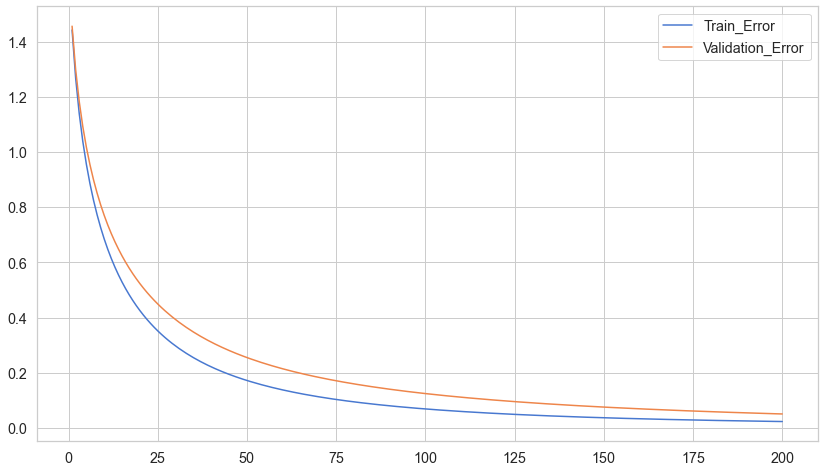

In [39]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
line = plt.plot(np.linspace(1, 200, 200), recommender.L_Tr, np.linspace(1, 200, 200), recommender.L_Val)
plt.legend(['Train_Error', 'Validation_Error'])
plt.show
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)** By increasing the learning rate (0.001 -> 0.002) and lowering lmbda (0.1 -> 0.07), we made the model agile and the
error on train and validation was halved (Tr: 0.05 -> 0.023, Val: 0.12 -> 0.06). Random shuffeling before each epoch also lowered the validation loss (0.06 -> 0.05). The above graph is the best result

# Making recommendations

In [40]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]
rating_predictions = recommender.predict(train, user_index)
print(rating_predictions)

[ 0.0070062   0.03420474  0.00666851 ...  0.03828195  0.0576754
 -0.02686091]


In [48]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
    artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
    artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [49]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [33]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

ValueError: All arrays must be of the same length

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**